In [2]:
import pandas as pd
import numpy as np
import torch
from torch import Tensor
import seaborn as sns
from matplotlib import pyplot as plt
from utils import distribution_functions

### Torch logistic function

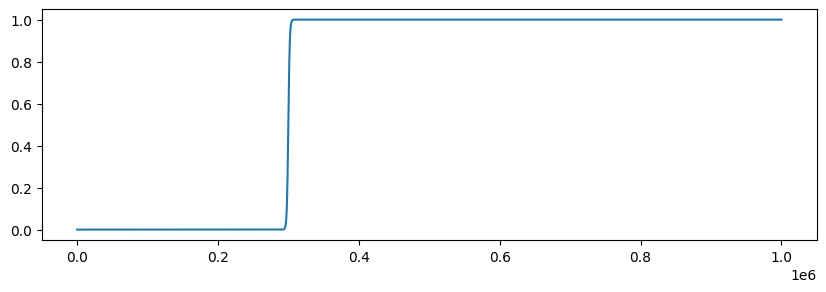

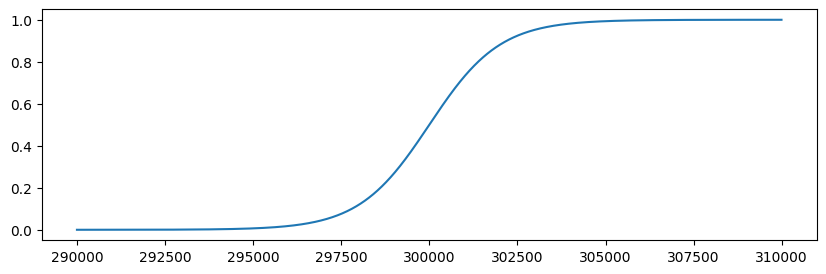

In [3]:
linspace, logistic = distribution_functions.logistic_tensor(3e5, 1e-3, 0, 1e6)


plt.figure(figsize=(10, 3))
sns.lineplot(x=linspace.numpy(), y=logistic.numpy());
plt.figure(figsize=(10, 3))

mask = (linspace > 2.9e5) & (linspace < 3.1e5)
sns.lineplot(x=linspace[mask].numpy(), y=logistic[mask].numpy());

# Binary search simulation

<Axes: >

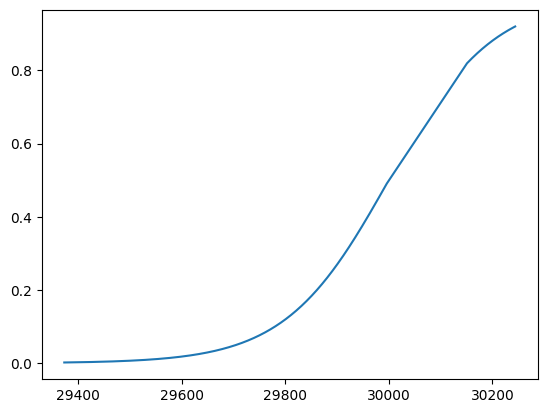

In [4]:
from utils import NNarySearch
import importlib
importlib.reload(NNarySearch)
        
binary = NNarySearch.NNarySearch(n=5, bounds=(0.1, 0.9), split_power=0.2)

res = binary.run_search(logistic)
sns.lineplot(res)


Text(50.722222222222214, 0.5, 'splits')

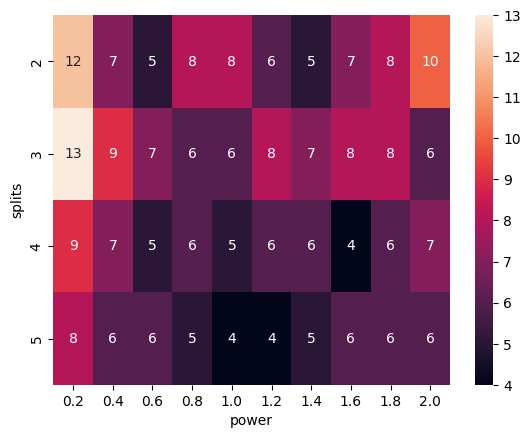

In [14]:
results = []
for splits in range(2, 6):
    for power in np.linspace(0.2, 2, 10):
        power = round(power,1)
        search = NNarySearch.NNarySearch(splits, split_power=power)
        search.run_search(logistic)
        results.append({
            "splits": splits,
            "power": power,
            "value": search.iterations,
        })

grid = pd.DataFrame(results)
pivot = grid.pivot(index="splits", columns="power", values="value")
sns.heatmap(pivot, annot=True)
plt.xlabel("power")
plt.ylabel("splits")

AttributeError: QuadMesh.set() got an unexpected keyword argument 'x'

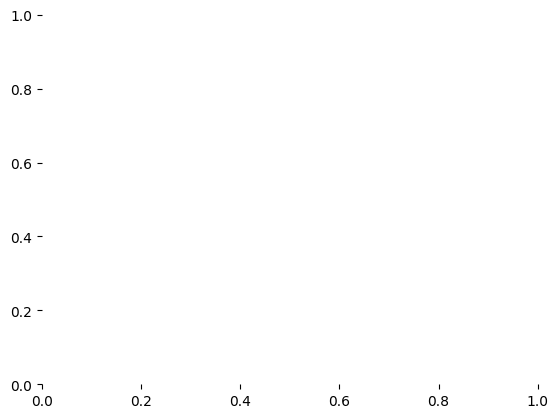

In [7]:
binary.display_history()

Iteration: 0


,0,1,2
0,initial,0,99999


Iteration: 1


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,79999,95998,99198,99838
end,79998,95997,99197,99837,99997
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 2


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,63749,76498,79048,79558
end,63748,76497,79047,79557,79996
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 3


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,50624,60748,62773,63178
end,50623,60747,62772,63177,63746
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 4


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,39999,47998,49598,49918
end,39998,47997,49597,49917,50621
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 5


,0,1,2,3,4
region,inflection,stable_high,stable_high,stable_high,stable_high
start,0,31874,38248,39523,39778
end,31873,38247,39522,39777,39996
min,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0


Iteration: 6


,0,1,2,3,4
region,stable_low,boundary,boundary,stable_high,stable_high
start,0,24999,29998,30998,31198
end,24998,29997,30997,31197,31871
min,0.0,0.0,0.49575,0.999954,0.999994
max,0.0,0.49325,0.999953,0.999994,1.0


Iteration: 7


,0,1,2,3,4
region,stable_low,inflection,stable_high,stable_high,stable_high
start,24999,29373,30247,30422,30457
end,29372,30246,30421,30456,30995
min,0.0,0.001894,0.922229,0.985557,0.989779
max,0.001875,0.921509,0.985415,0.989678,0.999952


Iteration: 8


,0,1,2,3,4
region,boundary,target_match,target_match,target_match,boundary
start,29373,29997,30121,30146,30151
end,29996,30120,30145,30150,30244
min,0.001894,0.49325,0.770835,0.811996,0.81951
max,0.490751,0.769064,0.810465,0.818026,0.92005
